# <center>__Projeto 1__</center>
### <center> Aluno: José Henrique Azevedo de Brito </center>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Parte 1 - Implementação e verificação do método prosposto do artigo <em> Quadratically
convergent algorithm for computing real root of non-linear transcendental equations </em>

In [66]:
def proposedMethod(f, fprime, a, b, erro = 1e-7, i = 100) :
    if (np.sign(f(a)) * np.sign(f(b)) != -1) :
        print("Não existe raiz nesse intervalo")
        return
    else :
        erroAt = np.inf
        xAn = np.inf
        iterations = 0
        while (erroAt > erro and iterations < i) :
            if (fprime(a) == 0) :
                a, b = interchange(a, b)
            x = a - (f(a) / (2 * fprime(a))) * ((f(a) - f(b) + ((a - b) * fprime(a))) / (f(a) - f(b)))
            #x = (((a * f(b) - b * f(a)) / (f(b) - f(a))) + (a - (f(a) / fprime(a)))) / 2
            print("a: %.10f b: %.10f x: %.10f" %(a, b, x))
            if (f(x) == 0) :
                print("Raiz encontrada! E ela é: ", x)
                return
            else :
                if (np.sign(f(x)) * np.sign(f(a)) == -1) :
                    a, x = interchange(a, x)
                if (np.sign(f(x)) * np.sign(f(b)) == -1) :
                    b = x
                if (xAn != np.inf) :
                    erroAt = np.abs(x - xAn) / np.abs(x)
                    print("erro: %.10f%% iterations: %d\n" %(erroAt * 100, iterations))
                else:
                    print("erro: %.10f iterations: %d\n" %(erroAt, iterations))
                xAn = x
                iterations += 1
        return

def interchange(num, num1) :
    aux = num1
    num1 = num
    num = aux
    return num, num1

Exemplo 3

In [67]:
f = lambda x: (x * np.exp(x)) - np.cos(x)
fprime = lambda x: np.exp(x) + (x * np.exp(x)) + np.sin(x)
proposedMethod(f, fprime, 0, 1)

a: 0.0000000000 b: 1.0000000000 x: 0.6573326689
erro: inf iterations: 0

a: 0.6573326689 b: 0.0000000000 x: 0.4886346948
erro: 100.0000000000% iterations: 1

a: 0.4886346948 b: 0.6573326689 x: 0.5165087293
erro: 27.2645807523% iterations: 2

a: 0.4886346948 b: 0.5165087293 x: 0.5181382135
erro: 5.7044730493% iterations: 3

a: 0.5181382135 b: 0.5165087293 x: 0.5177572252
erro: 5.6941406572% iterations: 4

a: 0.5177572252 b: 0.5181382135 x: 0.5177573637
erro: 0.0735575914% iterations: 5

a: 0.5177572252 b: 0.5177573637 x: 0.5177573637
erro: 0.0000267397% iterations: 6

a: 0.5177573637 b: 0.5177573637 x: 0.5177573637
erro: 0.0000267440% iterations: 7

a: 0.5177573637 b: 0.5177573637 x: 0.5177573637
erro: 0.0000000000% iterations: 8



Exemplo 4

In [68]:
f = lambda x: x * np.log10(x) - 1.2
fprime = lambda x: np.log10(x) + (1 / np.log(10))
proposedMethod(f, fprime, 1, 3)

a: 1.0000000000 b: 3.0000000000 x: 3.2199123655
erro: inf iterations: 0

a: 3.2199123655 b: 1.0000000000 x: 2.6935256458
erro: 68.9432541484% iterations: 1

a: 2.6935256458 b: 3.2199123655 x: 2.7398077476
erro: 17.5232958709% iterations: 2

a: 2.6935256458 b: 2.7398077476 x: 2.7407508244
erro: 1.7182721773% iterations: 3

a: 2.7407508244 b: 2.7398077476 x: 2.7406460925
erro: 1.7230745012% iterations: 4

a: 2.7406460925 b: 2.7407508244 x: 2.7406460960
erro: 0.0038213057% iterations: 5

a: 2.7406460925 b: 2.7406460960 x: 2.7406460960
erro: 0.0000000000% iterations: 6



Exemplo 5

In [69]:
f = lambda x: 1 - x ** 2
fprime = lambda x: -2 * x
proposedMethod(f, fprime, 0, 2)

a: 2.0000000000 b: 0.0000000000 x: 0.8750000000
erro: inf iterations: 0

a: 0.8750000000 b: 2.0000000000 x: 0.9827251553
erro: 103.5157021529% iterations: 1

a: 0.8750000000 b: 0.9827251553 x: 1.0050454685
erro: 12.3114463177% iterations: 2

a: 1.0050454685 b: 0.9827251553 x: 0.9999844083
erro: 12.9392622061% iterations: 3

a: 0.9999844083 b: 1.0050454685 x: 0.9999999804
erro: 0.5045488109% iterations: 4

a: 0.9999844083 b: 0.9999999804 x: 1.0000000001
erro: 0.0015572426% iterations: 5

a: 1.0000000001 b: 0.9999999804 x: 1.0000000000
Raiz encontrada! E ela é:  1.0


Logo, podemos ver que a implementação do código conseguiu resultados praticamentes iguais aos mostrados no site!

Parte 2 - Cálculo de uma <em>European call option</em> usando o método proposto da parte 1

Em resuno, a fórmula BSM exibida na parte 2 é usada para calcular o preço justo de um contrato conhecido como <em>European call option</em>!Pela estrutura de sua equação, se tratae de uma equação não-linear transcendental! A equação é:
$$
    C = S\Phi (d_1) - Ke^{-rT}\Phi(d_2)
$$
$$
    \Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-t^2 / 2}dt
$$
$$
    d_1 = \tfrac{log(S/K) + (r + \sigma^2/2)T}{x}
$$
$$
    d_2 = d_1 - \sigma\sqrt{T}
$$
Onde K = preço de exercício ou de strike, T = expiração do contrato, S = preço do ativo, r = taxa de juros livre de risco, φ(x) = função de distribuição da variável aleatória normal padrão e σ = volatilidade do ativo subjacente

Na parte 1 do projeto, foi feito a implementação de um método para calcular raízes de equações não-linear transcendentais, um método misto que usa junção dos métodos da falsa posição e Newton-Raphson! Esses dois métodos foram escolhidos, pois, o falsa posição garante a convergência para a raiz e o método Newton-Raphson garante velocidade! E com isso, será calculado a raíz dessa equação usando esse método proposto!

Implementação

In [70]:
stdnormal = stats.norm(loc = 0, scale = 1)
phi = lambda x: stdnormal.cdf(x)

S = 7.01
K = 7.5
r = 0.0225
T = 6 / 252

In [71]:
def f(x) :
    d1 = (np.log(S/K)+(r+x**2/2)*T) / (x*np.sqrt(T))
    d2 = d1 - x*np.sqrt(T)
    return S*phi(d1) - K*np.exp(-r*T)*phi(d2)

def fprime(x) :
    d1 = (np.log(S/K)+(r+x**2/2)*T) / (x*np.sqrt(T))
    d2 = d1 - x*np.sqrt(T)
    A = (np.log(S/K)+(r+x**2/2)*T) / (np.sqrt(T)*x**2)
    return S*(np.exp(-d1**2/2) / np.sqrt(2*np.pi)) * (np.sqrt(T)-A) + K*np.exp(-(r*T+d2**2/2)) * A / np.sqrt(2*np.pi)

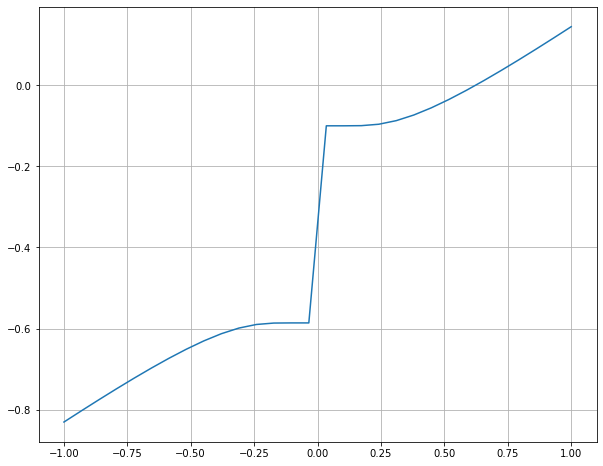

In [72]:
x = np.linspace(-1, 1, 30)
fp = lambda x: f(x) - 0.1
plt.figure(figsize = [10, 8])
plt.plot(x, fp(x))
plt.grid()

Podemos ver que a rais está entre -1 e 1, mas precisamente entre 0.5 e 0.75

Testando método com alguns intervalos, dentre eles, -1 e 1, e, 0.5 e 0.75

In [73]:
proposedMethod(lambda x: f(x) - 0.1, fprime, -1, 1, 1e-4, 60)

a: -1.0000000000 b: 1.0000000000 x: 0.8774096222
erro: inf iterations: 0

a: 0.8774096222 b: -1.0000000000 x: 0.6596062560
erro: 251.6055966572% iterations: 1

a: 0.8774096222 b: 0.6596062560 x: 0.6303457162
erro: 4.6419828062% iterations: 2

a: 0.8774096222 b: 0.6596062560 x: 0.6303457162
erro: 0.0000000000% iterations: 3



In [74]:
proposedMethod(lambda x: f(x) - 0.1, fprime, 0.5, 0.75, 1e-4, 60)

a: 0.5000000000 b: 0.7500000000 x: 0.6247966167
erro: inf iterations: 0

a: 0.6247966167 b: 0.5000000000 x: 0.6230635098
erro: 19.9739584666% iterations: 1

a: 0.6230635098 b: 0.6247966167 x: 0.6231138239
erro: 0.2700618650% iterations: 2

a: 0.6230635098 b: 0.6231138239 x: 0.6231138403
erro: 0.0080752711% iterations: 3



In [75]:
proposedMethod(lambda x: f(x) - 0.1, fprime, -10, 10, 1e-4, 60)

a: -10.0000000000 b: 10.0000000000 x: 2.0750928711
erro: inf iterations: 0

a: 2.0750928711 b: -10.0000000000 x: 0.6563165583
erro: 1623.6549914570% iterations: 1

a: 2.0750928711 b: 0.6563165583 x: 0.6560306547
erro: 0.0435808298% iterations: 2

a: 2.0750928711 b: 0.6563165583 x: 0.6560306547
erro: 0.0000000000% iterations: 3

